# Série TP 4 – Fouille de Données – Naive Bayes

## La classification naive bayesienne : CategoricalNB de scikit-learn

Doc : https://scikit-learn.org/stable/modules/naive_bayes.html & https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

Naive Bayes Classifiers in sklearn : **GaussianNB**, **CategoricalNB**, BernoulliNB, MultinomialNB, ComplementNB.

CategoricalNB implements the categorical naive Bayes algorithm for categorically distributed data.

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

#### Steps :

- Import necessary modules

- Load & explore the dataset

- Split the DataFrame into features (X) and target/class (y)

- Create training and test sets 

- Encode categorical data as numbers : LabelEncoding

- Train the model

- Predict and Evaluate : Accuracy & Confusion matrix

### Import necessary modules : scikit-learn package

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load & explore the dataset : Exercice 2 - Série TD 2

In [3]:
lst_data = [
    ['jeune', 'f', 'v', 'faible'],
    ['jeune', 'v', 'v', 'eleve'],
    ['adulte', 'f', 'f', 'faible'],
    ['senior', 'v', 'f', 'eleve'],
    ['senior', 'f', 'v', 'moyen'],
    ['jeune', 'f', 'f', 'faible'],
    ['adulte', 'v', 'f', 'moyen'],
    ['adulte', 'v', 'v', 'moyen'],
    ['senior', 'f', 'f', 'faible'],
    ['senior', 'v', 'v', 'eleve'],
]

In [4]:
df = pd.DataFrame(lst_data, columns=['age', 'S1', 'S2', 'risque'])

In [5]:
df.head()

,age,S1,S2,risque
0,jeune,f,v,faible
1,jeune,v,v,eleve
2,adulte,f,f,faible
3,senior,v,f,eleve
4,senior,f,v,moyen


In [6]:
df.shape

(10, 4)

In [7]:
df.describe()

,age,S1,S2,risque
count,10,10,10,10
unique,3,2,2,3
top,senior,f,v,faible
freq,4,5,5,4


In [8]:
df['risque'].value_counts()

faible    4
eleve     3
moyen     3
Name: risque, dtype: int64

In [9]:
np.unique(df['risque'])

array(['eleve', 'faible', 'moyen'], dtype=object)

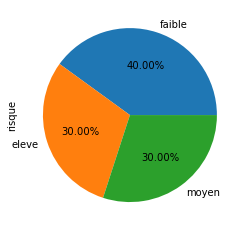

In [10]:
df['risque'].value_counts().plot(kind='pie', autopct='%.2f%%')
# plt.pie(df['temp'].value_counts(), labels=np.unique(df['age']), autopct='%.2f')
plt.show()

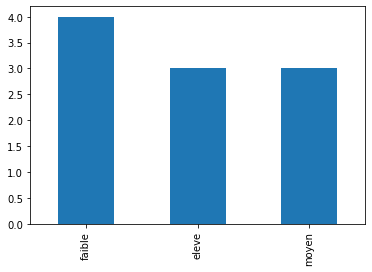

In [11]:
df['risque'].value_counts().plot(kind='bar')
plt.show()

### Split the DataFrame into features (X) and target/class (y) 

In [12]:
X = df[['age', 'S1', 'S2']]
y = df['risque']

### Create training and test sets : 70% of it is in the training set, and 30% of it is in the testing set.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
X_train.shape

(7, 3)

In [15]:
X_test.shape

(3, 3)

In [16]:
X_train

,age,S1,S2
0,jeune,f,v
7,adulte,v,v
2,adulte,f,f
9,senior,v,v
4,senior,f,v
3,senior,v,f
6,adulte,v,f


In [17]:
y_train

0    faible
7     moyen
2    faible
9     eleve
4     moyen
3     eleve
6     moyen
Name: risque, dtype: object

### Encode categorical data as numbers : LabelEncoding

Une machine ne peut comprendre que les nombres. Elle ne peut pas comprendre le texte. C'est aussi essentiellement le cas avec les algorithmes d'apprentissage automatique. 

C'est principalement la raison pour laquelle nous devons convertir les colonnes catégorielles en colonnes numériques afin que l'algorithme le comprenne. Ce processus est appelé l'encodage catégoriel (Encoding).

**L'encodage catégoriel est un processus de conversion de catégories en nombres.**

Besoin donc de transformation de nos données catégorielles en valeurs numériques.

- Label Encoding : Chaque catégorie se voit attribuer un entier unique basé sur l'ordre alphabétique.


In [18]:
# Copy of your training data
X_train_le = X_train.copy()

encoders = {} 

for col in X_train.columns:
    le = LabelEncoder()
    le.fit(X_train[col])                
    X_train_le[col] = le.transform(X_train[col])  
    encoders[col] = le                  

#### Printing encoding values

In [19]:
encoders["age"].classes_

array(['adulte', 'jeune', 'senior'], dtype=object)

In [20]:
# Or 
enc_values = [0, 1, 2]
decoded =  encoders["age"].inverse_transform(enc_values)
print(decoded)

['adulte' 'jeune' 'senior']


In [21]:
encoders["S1"].classes_

array(['f', 'v'], dtype=object)

In [22]:
encoders["S2"].classes_

array(['f', 'v'], dtype=object)

#### Showing Encoding results

In [23]:
X_train_le

,age,S1,S2
0,1,0,1
7,0,1,1
2,0,0,0
9,2,1,1
4,2,0,1
3,2,1,0
6,0,1,0


### Training phase : create the classifier & fit it on the encoded training data

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB

### Zero Frequency/Probablity Problem

Si une classe individuelle est manquante, l'estimation de probabilité basée sur la fréquence sera de zéro. Et nous obtiendrons un zéro lorsque toutes les probabilités seront multipliées.

Une approche pour surmonter ce problème consiste à ajouter 1 (**alpha**) au compte pour chaque combinaison valeur d'attribut-classe lorsqu'une valeur d'attribut n'apparaît pas avec chaque valeur de classe.

alpha = 1 is called **Laplace smoothing**, & alpha > 1 is called **Lidstone smoothing**. Defaut = 1.

Cela entraînera la suppression de toutes les valeurs nulles des classes et, en même temps, n'aura pas d'impact sur la fréquence relative globale des classes.

In [24]:
clf = CategoricalNB(alpha=1.0)

clf.fit(X_train_le, y_train)

CategoricalNB()

In [25]:
clf.alpha

1.0

**category_count_** : is an array of arrays (a list of NumPy arrays), where each inner array corresponds to one feature (categorical column) and contains the number of samples observed for each category value per feature across the entire training set.

It tells you how many training examples had each possible category for every feature.

It’s part of how Naive Bayes estimates conditional probabilities, P(xi∣y).

- Array per feature
- Array : (row, col) = (cls, feature_values)

In [26]:
clf.category_count_

[array([[0., 0., 2.],
        [1., 1., 0.],
        [2., 0., 1.]]),
 array([[0., 2.],
        [2., 0.],
        [1., 2.]]),
 array([[1., 1.],
        [1., 1.],
        [1., 2.]])]

In [27]:
clf.feature_names_in_

array(['age', 'S1', 'S2'], dtype=object)

In [28]:
clf.classes_

array(['eleve', 'faible', 'moyen'], dtype='<U6')

In [29]:
clf.class_count_

array([2., 2., 3.])

### Evaluate the predictive performance : Accuracy

In [30]:
# Copy of your training data
X_test_le = X_test.copy()

for col in X_test.columns:
    X_test_le[col] = encoders[col].transform(X_test[col])

In [38]:
y_preds = clf.predict(X_test_le)

In [31]:
print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.3333333333333333


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       eleve       0.00      0.00      0.00         1
      faible       1.00      0.50      0.67         2
       moyen       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.33      0.17      0.22         3
weighted avg       0.67      0.33      0.44         3



### Plot confusion matrix 

In [33]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_preds)

print(cf_matrix)

[[0 0 1]
 [0 1 1]
 [0 0 0]]


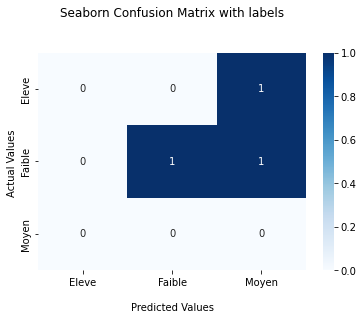

In [34]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['Eleve', 'Faible', 'Moyen'])
ax.yaxis.set_ticklabels(['Eleve', 'Faible', 'Moyen'])

## Display the visualization of the Confusion Matrix
plt.show()

### Predict one sample : ['jeune', 'v', 'f']

In [35]:
clf.predict([[1, 1, 0]])

array(['eleve'], dtype='<U6')

In [36]:
clf.predict_proba([[1, 1, 0]]) # ['Eleve', 'Faible', 'Moyen']

array([[0.40540541, 0.27027027, 0.32432432]])

In [ ]:
# OR

In [37]:
# New example
new_sample = pd.DataFrame([["jeune", "v", "f"]], columns=["age", "S1", "S2"])

# Encode it
new_sample_le = new_sample.copy()
for col in new_sample.columns:
    new_sample_le[col] = encoders[col].transform(new_sample[col])

# Predict
y_pred = clf.predict(new_sample_le)
print(y_pred)

['eleve']
